#Import packages

In [ ]:
# pandas will be required to work with Data Frame
import pandas as pd    

#numpy will be required for mathematical functions
import numpy as np     


#matplotlib and seaborn will be required for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns   

# train_test_split will be requiered to perform train test split
from sklearn.model_selection import train_test_split  

##Labels data that need to be represented in a matrix map with 0 and 1
from sklearn.preprocessing import OneHotEncoder 

#allows you to selectively apply data preparation transforms
from sklearn.compose import ColumnTransformer 

# import PolynomialFeatures to creat polynomial features 
from sklearn.preprocessing import PolynomialFeatures

# import different samplers to sample the imbalance Data
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# imblearn Pipline will be required if you want to include samplers 
# in the pipeline. sklearn.Pipeline does not allow sampler
from imblearn.pipeline import make_pipeline

# Pipeline is requirede to chained together differen Data Transforms
from sklearn.pipeline import Pipeline

# GridSearchCV is used for Hyperparameter tuning. 
# Given a set of different hyperparameters, GridSearchCV loops through all possible values
from sklearn.model_selection import GridSearchCV

# import diffrent scaler,as a preprocessing step before many machine learning models, 
from sklearn.preprocessing import StandardScaler

# import diffrent metrics as a useful measure of the success of prediction
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_auc_score, roc_curve, auc

# cross_val_score evaluate a score by cross-validation
from sklearn.model_selection import cross_val_score

#Validation curve determine training and test scores for varying parameter values
from sklearn.model_selection import validation_curve

# Import machine learning algorithms for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Acquire data

In [ ]:
original_train = pd.read_csv('train.csv')
original_test = pd.read_csv('test.csv')

In [ ]:
original_train.shape

(25310, 24)

In [ ]:
original_test.shape

(10848, 23)

In [ ]:
# Displaying the fist 5 lines of the dataset
original_train.head() 

,IsBadBuy,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,...,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
0,1,8,DODGE,1500 RAM PICKUP 2WD,ST,REG CAB 3.7L ST,GREY,AUTO,1.0,Alloy,...,4257.0,6863.0,7580.0,3496.0,4363.0,6833.0,7779.0,6420.0,0,920
1,0,9,NISSAN,SENTRA,GXE,4D SEDAN,BLUE,AUTO,2.0,Covers,...,2356.0,4635.0,5071.0,2223.0,2613.0,4626.0,4975.0,3950.0,0,894
2,0,4,CHEVROLET,TRAILBLAZER EXT 2WD,LS,4D SUV 4.2L LS,GREEN,AUTO,1.0,Alloy,...,9556.0,9393.0,10820.0,8407.0,9652.0,9580.0,10924.0,8520.0,0,1155
3,0,5,CHRYSLER,PT CRUISER,Bas,4D SEDAN,SILVER,AUTO,1.0,Alloy,...,4332.0,6951.0,7819.0,4154.0,5268.0,7510.0,8653.0,5870.0,0,1086
4,0,5,PONTIAC,GRAND PRIX,Bas,4D SEDAN,WHITE,AUTO,1.0,Alloy,...,6099.0,8291.0,9680.0,4089.0,5451.0,7696.0,8937.0,6595.0,0,1974


In [ ]:
original_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25310 entries, 0 to 25309
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           25310 non-null  int64  
 1   VehicleAge                         25310 non-null  int64  
 2   Make                               25310 non-null  object 
 3   Model                              25310 non-null  object 
 4   Trim                               24472 non-null  object 
 5   SubModel                           25309 non-null  object 
 6   Color                              25309 non-null  object 
 7   Transmission                       25309 non-null  object 
 8   WheelTypeID                        23476 non-null  float64
 9   WheelType                          23474 non-null  object 
 10  VehOdo                             25310 non-null  int64  
 11  Nationality                        25309 non-null  obj

From this, we know that there are 24 columns in the original data, one of which is the target label, so there are at most 23 features for analysis. There are 9 columns whose dtype is object, and we can transform them into category type if they are useful for classification. The rest of the columns are features of numerical type, they may be straightforward to handle, but we also need to do some checks. We also see that not all data is non-null, which we'll deal with later.

Next we can check if the data is balanced

In [ ]:
distrib_target = pd.crosstab(index=original_train.loc[:,"IsBadBuy"],columns="count",normalize="columns")
distrib_target

col_0,count
IsBadBuy,
0,0.751758
1,0.248242


The original train dataset is unbalanced, which may lead to classifiers learn worse than with balanced data. Resamplers would possibly be needed in the subsequent data collation.

#Data cleaning

To perform data cleaning, we first need to understand the meaning of features corresponding to each column

In [ ]:
with open('../content/metaData.txt') as descp:
    print (descp.read())

IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
MMRAcquisitionAuctionAveragePrice	Acquisition price for this vehicle in average condition at time of purchase	
MMRAcquisitionAuctionCleanPrice	Acquisition price for this vehicle in the above Average condition at time of purchase
MMRAcquisitionRetailAveragePrice	Acquisition price for this vehicle in the retail market in average condition at time of purchase
MMRAcquisitonRetailCleanPrice		Acquisition price f

"IsBadBuy" is the target tag, which should be category type.


"WheelTypeID" and "IsOnlineSale" should also be category type though they are now numerical dtype. 

##Categorical features
We can start by picking a category feature with relatively less unique values to see if its correlation with the distribution of the target. We pick "IsOnlineSale"

In [ ]:
pd.crosstab(index=original_train.loc[:, 'IsOnlineSale'],
      columns=original_train.loc[:,'IsBadBuy'], 
      normalize="index",dropna="False").sort_values(by=[1], ascending=False)

IsBadBuy,0,1
IsOnlineSale,,
0,0.751662,0.248338
1,0.755521,0.244479


It seems that whether it is online sale or not, the distribution of "BadBuy" is very close to the distribution of that in the whole dataset. So maybe it is not considered a useful feature

After that, we found that, intuitively the "WheelType" may has same information with "WheelTypeID".

Alloy      12284
Covers     10922
NaN         1836
Special      268
Name: WheelType, dtype: int64
-------
1.0    12284
2.0    10922
NaN     1834
3.0      268
0.0        2
Name: WheelTypeID, dtype: int64


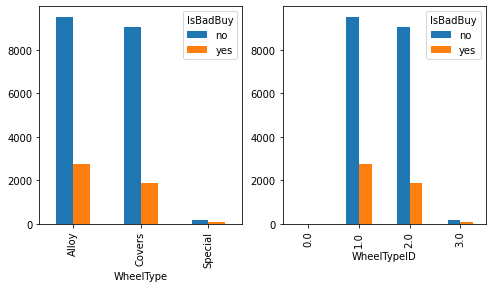

In [ ]:
print(original_train.WheelType.value_counts(dropna=False))
print('-------')
print(original_train.WheelTypeID.value_counts(dropna=False))
distrib_WheelType = pd.crosstab(index=original_train.loc[:, 'WheelType'],columns=original_train.loc[:,'IsBadBuy'])
distrib_WheelType.columns = ["no", "yes"]
distrib_WheelTypeID = pd.crosstab(index=original_train.loc[:, 'WheelTypeID'],columns=original_train.loc[:,'IsBadBuy'])
distrib_WheelTypeID.columns = ["no", "yes"]
fig, ax = plt.subplots(1,2,figsize=(8,4))
distrib_WheelType.iloc[:,0:2].plot(kind='bar',ax=ax[0],linewidth=1)
ax[0].legend(title="IsBadBuy")
distrib_WheelTypeID.iloc[:,0:2].plot(kind='bar',ax=ax[1],linewidth=1)
ax[1].legend(title="IsBadBuy")

From the count of each value and the distribution of "IsBadBuy", we can see "WheelType" and "WheelTypeID" almost have same information, so we can drop the "WheelTypeID" column.

Then we look at how many unique values are contained in each categorical feature.

In [ ]:
category_col = ['Make','Model','Trim','SubModel','Color','Transmission','WheelType','Nationality','Size','IsOnlineSale']
for i in category_col:
    print(i)
    print("----")
    #print('unique: ', original_train.loc[:,i].unique())
    print('unique sum: ', len(original_train.loc[:,i].unique()))
    print("-------------------------------------------------------------------------------")

Make
----
unique sum:  31
-------------------------------------------------------------------------------
Model
----
unique sum:  898
-------------------------------------------------------------------------------
Trim
----
unique sum:  125
-------------------------------------------------------------------------------
SubModel
----
unique sum:  694
-------------------------------------------------------------------------------
Color
----
unique sum:  17
-------------------------------------------------------------------------------
Transmission
----
unique sum:  4
-------------------------------------------------------------------------------
WheelType
----
unique sum:  4
-------------------------------------------------------------------------------
Nationality
----
unique sum:  5
-------------------------------------------------------------------------------
Size
----
unique sum:  13
-------------------------------------------------------------------------------
IsOnlineSale
----
un

'Model', 'Trim' and 'SubModel' have too many values, we would try dropping them to decrease computational consumption.

Let's see if the values in the rest of the features are reasonable

In [ ]:
category_col_conc = ['Make','Color','Transmission','WheelType','Nationality','Size']
for i in category_col_conc:
    print(i)
    print('unique: ', original_train.loc[:,i].unique())
    print("-------------------------------------------------------------------------------")

Make
unique:  ['DODGE' 'NISSAN' 'CHEVROLET' 'CHRYSLER' 'PONTIAC' 'FORD' 'TOYOTA'
 'SATURN' 'KIA' 'JEEP' 'MAZDA' 'MITSUBISHI' 'SUZUKI' 'OLDSMOBILE' 'GMC'
 'HONDA' 'BUICK' 'HYUNDAI' 'MERCURY' 'VOLKSWAGEN' 'LINCOLN' 'LEXUS'
 'CADILLAC' 'SCION' 'MINI' 'ISUZU' 'ACURA' 'SUBARU' 'INFINITI' 'VOLVO'
 'TOYOTA SCION']
-------------------------------------------------------------------------------
Color
unique:  ['GREY' 'BLUE' 'GREEN' 'SILVER' 'WHITE' 'RED' 'GOLD' 'BLACK' 'MAROON'
 'BEIGE' 'ORANGE' 'BROWN' 'YELLOW' 'NOT AVAIL' 'OTHER' 'PURPLE' nan]
-------------------------------------------------------------------------------
Transmission
unique:  ['AUTO' 'MANUAL' nan 'Manual']
-------------------------------------------------------------------------------
WheelType
unique:  ['Alloy' 'Covers' nan 'Special']
-------------------------------------------------------------------------------
Nationality
unique:  ['AMERICAN' 'TOP LINE ASIAN' 'OTHER ASIAN' 'OTHER' nan]
-----------------------------------

In "Model", we have reason to believe that "TOYOTA SCION" and "SCION" refer to the same value.

In "Color", nan values can be classified as "NOT AVAIL".

In "Transmission", "MANUAL" and "Manual" should be merged into one.

In other features, the nan values should also be replaced.

##Numerical features


Let's first look at the distribution of each feature.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7f00d1e80>,
      dtype=object)

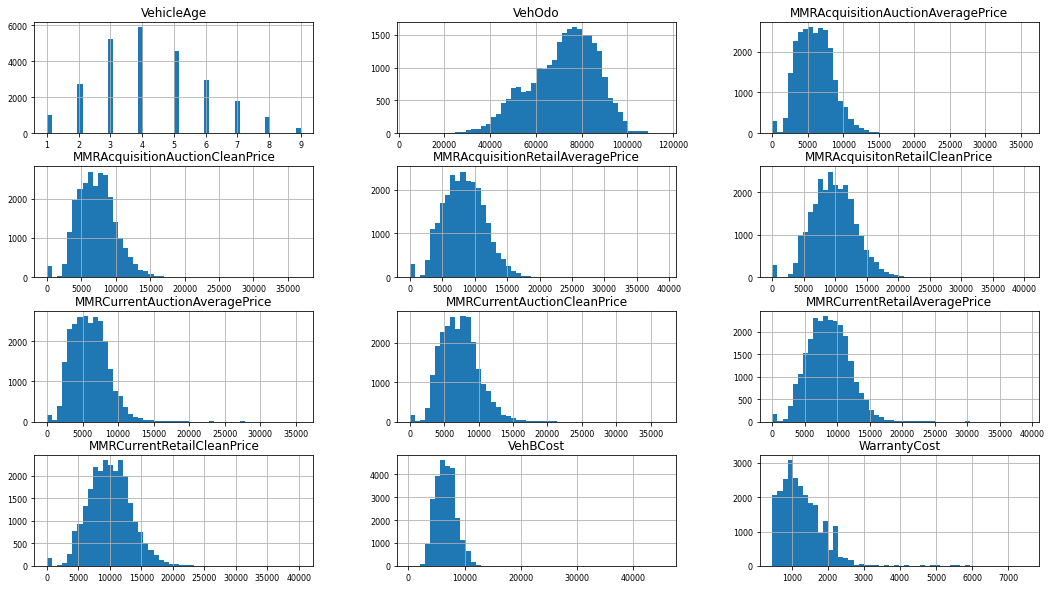

In [ ]:
columns_to_drop=['IsBadBuy','WheelTypeID','IsOnlineSale']
numerical_features = original_train.select_dtypes(include = ['float64', 'int64']).columns.drop(columns_to_drop)
original_train[numerical_features].hist(figsize=(18, 10), bins=50,xlabelsize=8, ylabelsize=8)

It can be seen that the values of the features follow an intuitively reasonable distribution, but in the MMR-values, the zero values seem to be counterintuitively high. According to the overall distribution trend, in the very low price range, the cheaper the car should be the less, so the car with a value of 0 may have an input error in its data. Consider treating them as null values or eliminating them

In [ ]:
MMR=['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
     'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice']
for i in MMR:
  mask = original_train.loc[:,i] ==0
  print(mask.sum())

295
249
295
295
170
127
170
170


In addition, it is observed in the histogram of "VehBCost" that the position where the values concentrate has a long distance from the left and right boundaries. By looking at the values on both sides, 12 outliers can be found. However, it is possible that these values are reasonable and the small number of outliers may not affect training model.

11


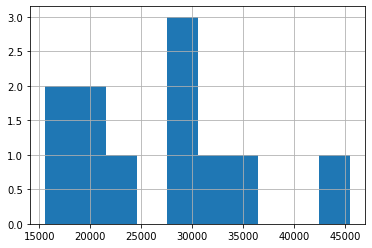

In [ ]:
mask = original_train.loc[:,"VehBCost"] >15000
print(mask.sum())
original_train.loc[mask,"VehBCost"].hist()

1


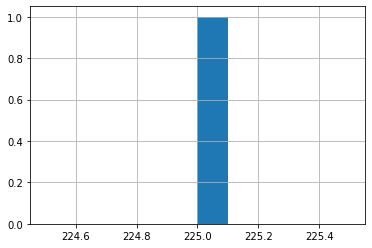

In [ ]:
mask = original_train.loc[:,"VehBCost"] <1000
print(mask.sum())
original_train.loc[mask,"VehBCost"].hist()

Then let's look at the correlation of each numerical feature.

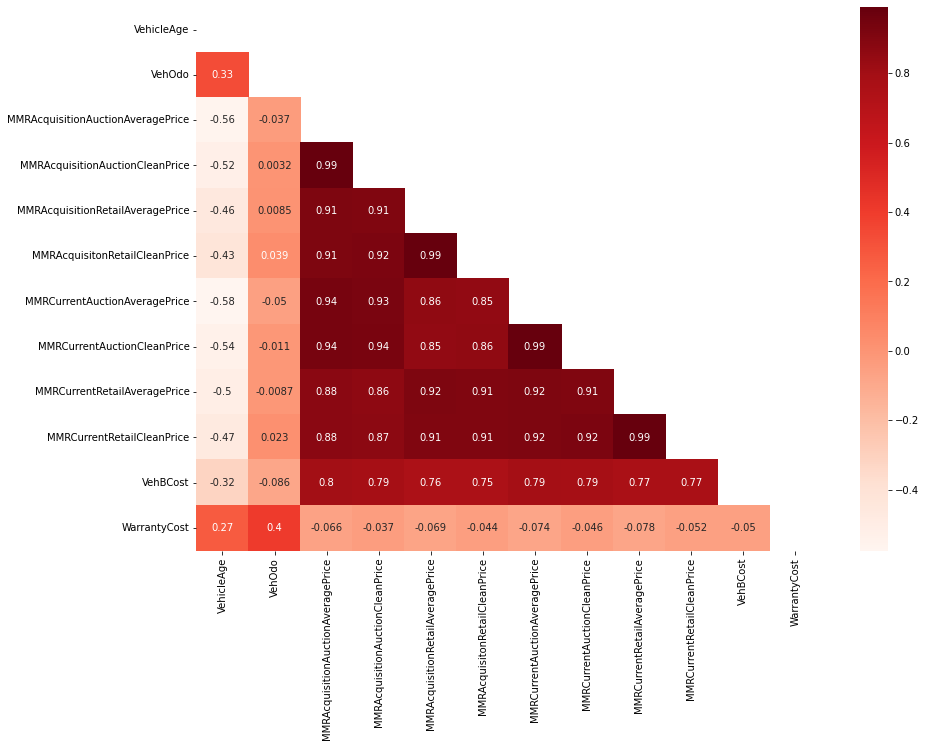

In [ ]:
plt.figure(figsize=(14, 10))
mask_matrix=np.triu(original_train[numerical_features].corr())
sns.heatmap(original_train[numerical_features].corr(), annot=True, cmap=plt.cm.Reds,mask=mask_matrix)

It is clear that the correlation of MMR-values are high, reachiing 0.99. 
We can drop at least half of them without any significant impact on the information of the training data

Finally, let's look at the null and duplicate.

In [ ]:
print(original_train.isna().sum())
print("---------------------")
print('Sum of Duplicates', original_train.duplicated().sum())

IsBadBuy                                0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                  838
SubModel                                1
Color                                   1
Transmission                            1
WheelTypeID                          1834
WheelType                            1836
VehOdo                                  0
Nationality                             1
Size                                    1
MMRAcquisitionAuctionAveragePrice       7
MMRAcquisitionAuctionCleanPrice         7
MMRAcquisitionRetailAveragePrice        7
MMRAcquisitonRetailCleanPrice           7
MMRCurrentAuctionAveragePrice         108
MMRCurrentAuctionCleanPrice           108
MMRCurrentRetailAveragePrice          108
MMRCurrentRetailCleanPrice            108
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                      

##Summary

1. We need to take out the "IsBadBuy" as the target label.
2. In the categorical features, "IsOnlinSale" is nearly independent with the target, "Model", "Trim" and "Submodel" features have too many values, making it difficult to classify, and "WheelTypeID" is repeated information of "WheelType", so drop these 5 features.
3. In the categorical features, some features have different values practically refer to same concept, should be merged.
4. In numerical features, some features(MMR-values) have very high correlation, and only half or less of them need to be kept.
5. In numerical features, there are some outliers that may need to be dropped.
6. In both features, there are many null values, which may be considered to be dropped or filled with suitable data.

##Data cleaning function

In [ ]:
def clean_data(inputdf,drop_high_corr=True,drop_outlier=False,modify_MMR_zeros=False):
  
  #Copy a new dataset in case this may affects the source data
  dataset=inputdf.copy(deep=True)

  #Drop the independent feature and features with too many categories or redundant information
  dataset.drop(['IsOnlineSale','Model','Trim','SubModel','WheelTypeID'],axis=1,inplace=True)

  #Replace different values with same meaning
  dataset.Transmission.replace(to_replace='Manual', value = "MANUAL", inplace = True)
  dataset.Make.replace(to_replace='TOYOTA SCION', value = "SCION", inplace = True)
  
  #Replace the 0 values in MMRs with null values [optional] 
    #so that they will be filled with the mean values in the next step
    #Not sure if it is right to handle the outliers in MMRs, 
    #because there are also a lot of 0s in test data too. 
    #This function can choose to change them to null, or not change them. 
    #We can compare the effect of each strategy
  MMR=['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
     'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
     'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
     'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice']
  if modify_MMR_zeros==True:
    for i in MMR:
      dataset.loc[:,i].replace(to_replace=0, value = np.NaN, inplace = True)
  
  #Fill null with "NOT AVAIL", just to match a existing category in "Color"
  #I think this is no different from filling with "Unknown"

  categorical_values = {'Color': 'NOT AVAIL','Transmission': 'NOT AVAIL','WheelType': 'NOT AVAIL','Nationality': 'NOT AVAIL','Size': 'NOT AVAIL'}
  dataset.fillna(value=categorical_values,inplace=True)

  #Fill null with mean values, which need to be calculated beyond this function
  numerical_values=dataset.select_dtypes(include = ['float64', 'int64']).columns.tolist()
  dataset[numerical_values]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(dataset[numerical_values])
 
  #Drop outliers in "VehBCost" [optional]
  if drop_outlier==True:
    mask_1 = dataset.loc[:,"VehBCost"] < 1000
    mask_2 = dataset.loc[:,"VehBCost"] > 20000
    mask=mask_1+mask_2
    dataset=dataset.loc[~mask,:]

  #Drop MMRs with high correlation [optional]
  if drop_high_corr==True:
    dataset.drop(['MMRAcquisitionAuctionCleanPrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailCleanPrice'],axis=1,inplace=True)
  
  cat_cols = ['Make','Color','Transmission','WheelType','Nationality','Size']

  #Transform each feature into proper type
  for i in cat_cols:
    dataset[i] = dataset[i].astype("category")

  return dataset

In [ ]:
def clean_data_more_features(inputdf,drop_outlier=False,modify_MMR_zeros=False):
  
  dataset=inputdf.copy(deep=True)

  dataset.drop(['WheelTypeID'],axis=1,inplace=True)

  dataset.Transmission.replace(to_replace='Manual', value = "MANUAL", inplace = True)
  dataset.Make.replace(to_replace='TOYOTA SCION', value = "SCION", inplace = True)
  
  MMR=['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
     'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice',
     'MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
     'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice']
  if modify_MMR_zeros==True:
    for i in MMR:
      dataset.loc[:,i].replace(to_replace=0, value = np.NaN, inplace = True)

  categorical_values = {'Color': 'NOT AVAIL','Transmission': 'NOT AVAIL','WheelType': 'NOT AVAIL','Nationality': 'NOT AVAIL','Size': 'NOT AVAIL','IsOnlineSale': 'NOT AVAIL','Model': 'NOT AVAIL','Trim': 'NOT AVAIL','SubModel': 'NOT AVAIL',}
  dataset.fillna(value=categorical_values,inplace=True)

  cat_cols = ['Make','Color','Transmission','WheelType','Nationality','Size','IsOnlineSale','Model','Trim','SubModel']
  for i in cat_cols:
    dataset[i] = dataset[i].astype("category")

  numerical_values=dataset.select_dtypes(include = ['float64', 'int64']).columns.tolist()
  dataset[numerical_values]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(dataset[numerical_values])
 
  if drop_outlier==True:
    mask_1 = dataset.loc[:,"VehBCost"] < 1000
    mask_2 = dataset.loc[:,"VehBCost"] > 20000
    mask=mask_1+mask_2
    dataset=dataset.loc[~mask,:]

  return dataset

In [ ]:
def Encoder(inputdf,Encoder='onehot',features='less'):
  fit1=x_train_cleaned.copy(deep=True)
  fit2=x_test_cleaned.copy(deep=True)
  copy=inputdf.copy(deep=True)
  if features=='more':
    cat_cols = ['Make','Color','Transmission','WheelType','Nationality','Size','IsOnlineSale','Model','Trim','SubModel']
  else:
    cat_cols = ['Make','Color','Transmission','WheelType','Nationality','Size']
  if Encoder == 'onehot':
    ohe= OneHotEncoder(sparse=False,handle_unknown='ignore')
    col_transformer = ColumnTransformer([("OHE", ohe, cat_cols)], remainder="passthrough")
    col_transformer.fit(pd.concat([fit1,fit2],axis=0))
    ohe_names = col_transformer.named_transformers_['OHE'].get_feature_names(cat_cols)
    remaining_names = copy.columns[col_transformer._remainder[2]]
    copy = pd.DataFrame(col_transformer.transform(copy),columns=list(ohe_names)+list(remaining_names),index=copy.index)
  elif Encoder == 'label':
    for i in cat_cols:
      label_encoder = LabelEncoder().fit(pd.concat([fit1,fit2],axis=0)[i])
      copy[i] = label_encoder.transform(copy[i])
  
  return copy

#Data Preparation

In [ ]:
x_train = original_train.drop('IsBadBuy',axis=1).copy(deep=True)
y_train = original_train.loc[:,'IsBadBuy'].copy(deep=True)
x_test = original_test.copy(deep=True)

###With less features

In [ ]:
x_train_cleaned = clean_data(x_train,drop_high_corr=True,drop_outlier=True,modify_MMR_zeros=True)
y_train = y_train.loc[x_train_cleaned.index]
x_test_cleaned = clean_data(x_test,drop_high_corr=True,drop_outlier=False,modify_MMR_zeros=True)

In [ ]:
X_train_all=Encoder(x_train_cleaned,Encoder='onehot')
X_test=Encoder(x_test_cleaned,Encoder='onehot')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###With more features

In [ ]:
x_train_cleaned = clean_data_more_features(x_train,drop_outlier=True,modify_MMR_zeros=True)
y_train = y_train.loc[x_train_cleaned.index]
x_test_cleaned = clean_data_more_features(x_test,drop_outlier=False,modify_MMR_zeros=True)

In [ ]:
X_train_all=Encoder(x_train_cleaned,Encoder='onehot',features='more')
X_test=Encoder(x_test_cleaned,Encoder='onehot',features='more')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###Split and resample(optional)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train_all,y_train,random_state=5,test_size=0.4)

In [ ]:
#oversampler=SMOTE(random_state=0)
#X_train,Y_train=oversampler.fit_resample(X_train,Y_train)

#Build and Select Classifier

### Regularized Logistic Regression

In [ ]:
logreg = LogisticRegression() # Check LogsiticRegressionCV function instead, does cross-validation on top of reg logistic regression
clf_logreg = logreg.fit(X_train, Y_train) # Train classifier (clf)
acc_train_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_test_log = round(logreg.score(X_val, Y_val) * 100, 2)
roc_test_log = round(roc_auc_score(Y_val, clf_logreg.predict_proba(X_val)[:, 1]),3) # We imported roc_auc_score from sklearn
print('logistic regression train accurary: ',acc_train_log)
print('logistic regression test accurary: ',acc_test_log)
print('logistic regression test ROC: ',roc_test_log)

logistic regression train accurary:  75.47
logistic regression test accurary:  74.86
logistic regression test ROC:  0.629


### Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=300, criterion='gini')
clf_RF = random_forest.fit(X_train, Y_train)
acc_train_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_test_random_forest = round(random_forest.score(X_val, Y_val) * 100, 2)
roc_test_random_forest = round(roc_auc_score(Y_val, clf_RF.predict_proba(X_val)[:, 1]),3)

print('Random Forest train accurary: ',acc_train_random_forest)
print('Random Forest test accurary: ',acc_test_random_forest)
print('Random Forest test ROC: ',roc_test_random_forest)

Random Forest train accurary:  100.0
Random Forest test accurary:  79.58
Random Forest test ROC:  0.735


### Various Gradient Boosting Classifiers

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBDT = GradientBoostingClassifier()
clr = GBDT.fit(X_train, Y_train)
acc_train_GBDT = round(GBDT.score(X_train, Y_train) * 100, 2)
acc_test_GBDT = round(GBDT.score(X_val, Y_val) * 100, 2)
roc_test_GBDT = round(roc_auc_score(Y_val, clr.predict_proba(X_val)[:,1]),5)
print('GBDT train accurary: ',acc_train_GBDT)
print('GBDT test accurary: ',acc_test_GBDT)
print('GBDT test ROC: ',roc_test_GBDT)

GBDT train accurary:  81.34
GBDT test accurary:  80.01
GBDT test ROC:  0.74973


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=4,n_estimators=125)
clr = xgb.fit(X_train, Y_train)
acc_train_xgb = round(xgb.score(X_train, Y_train) * 100, 2)
acc_test_xgb = round(xgb.score(X_val, Y_val) * 100, 2)
roc_test_xgb = round(roc_auc_score(Y_val, clr.predict_proba(X_val)[:,1]),5)
print('xgb train accurary: ',acc_train_xgb)
print('xgb test accurary: ',acc_test_xgb)
print('xgb test ROC: ',roc_test_xgb)

xgb train accurary:  81.74
xgb test accurary:  79.93
xgb test ROC:  0.75108


In [ ]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(max_depth=3,n_estimators=171)
clr_lgbm = lgbm.fit(X_train, Y_train)
acc_train_lgbm = round(lgbm.score(X_train, Y_train) * 100, 2)
acc_test_lgbm = round(lgbm.score(X_val, Y_val) * 100, 2)
roc_test_lgbm = round(roc_auc_score(Y_val, clr_lgbm.predict_proba(X_val)[:,1]),5)
print('lgbm train accurary: ',acc_train_lgbm)
print('lgbm test accurary: ',acc_test_lgbm)
print('lgbm test ROC: ',roc_test_lgbm)

lgbm train accurary:  81.32
lgbm test accurary:  79.93
lgbm test ROC:  0.753


# Make ROC Curves to Visually Compare Models

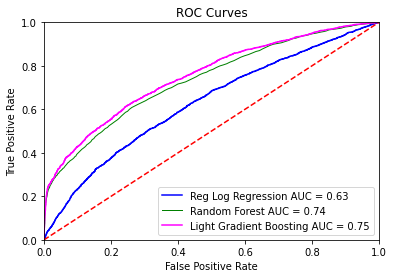

In [ ]:
# Make ROC-AUC Curves
probs_logreg = clf_logreg.predict_proba(X_val)
preds_logreg = probs_logreg[:,1]
fpr_logreg, tpr_logreg, threshold = roc_curve(Y_val, preds_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

probs_RF = clf_RF.predict_proba(X_val)
preds_RF = probs_RF[:,1]
fpr_RF, tpr_RF, threshold = roc_curve(Y_val, preds_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)

probs_lgbm = clr_lgbm.predict_proba(X_val)
preds_lgbm = probs_lgbm[:,1]
fpr_lgbm, tpr_lgbm, threshold = roc_curve(Y_val, preds_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.title('ROC Curves')
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'Reg Log Regression AUC = %0.2f' % roc_auc_logreg)
plt.plot(fpr_RF, tpr_RF, 'g', linewidth = 1, label = 'Random Forest AUC = %0.2f' % roc_auc_RF)
plt.plot(fpr_lgbm, tpr_lgbm, 'magenta', label = 'Light Gradient Boosting AUC = %0.2f' % roc_auc_lgbm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Create CSV for Submission

In [ ]:
#oversampler=SMOTE(random_state=0)
#X_train,y_train=oversampler.fit_resample(X_train,y_train)

In [ ]:
clr = lgbm.fit(X_train_all, y_train)

In [ ]:
target_test=clr.predict_proba(X_test)[:,1]

In [ ]:
#According to the distribution of the train set, this sum should be around 2700
np.sum(target_test)

2692.1008959672154

In [ ]:
submission=pd.DataFrame(target_test.reshape(-1,1), index=x_test.index)

In [ ]:
submission.to_csv('submission.csv', encoding='utf-8')